Interactive Dashboards with Jupyter
----


In [13]:
from ipywidgets import widgets  

 Text input field 
 ---

In [6]:
from IPython.display import display
txt = widgets.Text()
display(txt)

def handle_submit(sender):
    print(txt.value)
    
txt.on_submit(handle_submit)

hi
Text box
chelsea


Buttons:
---

In [9]:
button = widgets.Button(description = "Press Me")
display(button)

def on_button_press(b):
    print ("Button Pressed")
    
    
button.on_click(on_button_press)

Button Pressed


Scroll Bar
---

In [19]:
from ipywidgets import interact  
9def f(x):
    print (x)
    
interact(f, x=20)


60


None

Boolean 
---

In [21]:
interact(f, x= True)

False


None

In [23]:
outputText = widgets.Text()
outputText

In [26]:
inputText = widgets.Text()

def makeUpperCase(sender):
    outputText.value = inputText.value.upper()
    
inputText.on_submit(makeUpperCase)
inputText

Interactive visualizations
---

<IPython.core.display.Javascript object>


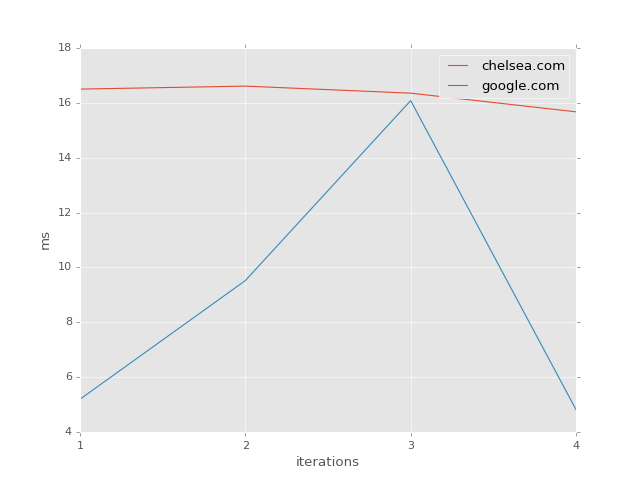

In [70]:
%matplotlib notebook
import pandas as pd  
import matplotlib.pyplot as plt  
from ipywidgets import *  
from IPython.display import display  
from IPython.html import widgets  
from ipykernel import *
plt.style.use('ggplot')

NUMBER_OF_PINGS = 4

#displaying the text widget
text = widgets.Text(description="Domain to ping", width=200)  
display(text)

#preparing the plot 
data = pd.DataFrame()  
x = range(1,NUMBER_OF_PINGS+1)  
plots = dict()  
fig, ax = plt.subplots()  
plt.xlabel('iterations')  
plt.ylabel('ms')  
plt.xticks(x)  
plt.show()

#preparing a container to put in created checkbox per domain
checkboxes = []  
cb_container = widgets.HBox()  
display(cb_container)

#add button that updates the graph based on the checkboxes
button = widgets.Button(description="Update the graph")

#function to deal with the added domain name
def handle_submit(sender):  
    #a part of the magic inside python : pinging
    res = !ping -c {NUMBER_OF_PINGS} {text.value}
    hits = res.grep('64 bytes').fields(-2).s.replace("time=","").split()
    if len(hits) == 0:
        print "Domain gave error on pinging"
    else:
         #rebuild plot based on ping result
        data[text.value] = hits
        data[text.value] = data[text.value].astype(float)
        plots[text.value], = ax.plot(x, data[text.value], label=text.value)
        plt.legend()
        plt.draw()
        #add a new checkbox for the new domain
        checkboxes.append(widgets.Checkbox(description = text.value, value=True, width=90))
        cb_container.children=[i for i in checkboxes]
        if len(checkboxes) == 1:
            display(button)

#function to deal with the checkbox update button       
def on_button_clicked(b):  
    for c in cb_container.children:
        if not c.value:
            plots[c.description].set_visible(False)
        else:
            plots[c.description].set_visible(True)
    plt.legend()
    plt.draw()

button.on_click(on_button_clicked)  
text.on_submit(handle_submit)  
plt.show() 